In [1]:
           # Data processing
import pandas as pd
import datetime as dt
from dateutil.parser import parse
import re

# Data visulization
import matplotlib as mpl
import matplotlib.pyplot as plt

import process as pr

dualgnn, dragon은 user_graph_dict.npy라는 파일이 필요함. baby에는 있는데 나머지에는 없음

baby - baby.inter, i_id_mapping.csv, image_feat.npy, text_feat.npy, u_id_mapping.csv, user_graph_dict.npy

clothging - clothing.inter, i_id_mapping.csv, image_feat.npy, text_feat.npy, u_id_mapping.csv

elec - elec.iter, image_feat.npy, text_feat.npy

In [3]:
import numpy as np

"""
# .npy 파일 경로
file_path = '/home/sh0408sh/workspace/MMRec/data/baby/user_graph_dict.npy'

# .npy 파일 읽기
data = np.load(file_path, allow_pickle=True)

# 데이터 확인
print(data)
print("배열의 형태:", data.shape) # (7050, 4096) - 7050개의 item image feature embedding(dimension = 4096)
print("배열의 데이터 타입:", data.dtype)
"""

'\n# .npy 파일 경로\nfile_path = \'/home/sh0408sh/workspace/MMRec/data/baby/user_graph_dict.npy\'\n\n# .npy 파일 읽기\ndata = np.load(file_path, allow_pickle=True)\n\n# 데이터 확인\nprint(data)\nprint("배열의 형태:", data.shape) # (7050, 4096) - 7050개의 item image feature embedding(dimension = 4096)\nprint("배열의 데이터 타입:", data.dtype)\n'

In [4]:
models = ['BM3','FREEDOM','GRCN','ItemKNNCBF', 'LATTICE']
log_names = ['BM3-clothing-Aug-05-2024-11-40-19.log',
             'FREEDOM-clothing-Aug-05-2024-20-15-05.log',
             'GRCN-clothing-Aug-06-2024-10-23-33.log',
             'ItemKNNCBF-clothing-Aug-06-2024-20-03-17.log',
             'LATTICE-clothing-Aug-06-2024-20-05-30.log']

In [5]:
l = []
data = []

for i in range(len(models)) :
    f = open(log_names[i], "r")
    l.append(f.readlines())
    f. close()

    data.append(pr.splitor(l[i])[-1])

In [6]:
df = pd.DataFrame()
for i in range(len(models)) :
    best = pr.Best(data[i])
    best['model'] = [models[i], models[i]]
    df = pd.concat([df,best])

df

,seed,n_layers,reg_weight,dropout,recall@5,recall@10,recall@20,recall@50,ndcg@5,ndcg@10,...,precision@50,map@5,map@10,map@20,map@50,type,model,learning_rate,shrink,knn_k
0,999.0,1.0,0.010,0.3,0.0266,0.0420,0.0628,0.1005,0.0175,0.0225,...,0.0020,0.0144,0.0165,0.0179,0.0191,Valid,BM3,NaN,NaN,NaN
0,999.0,1.0,0.010,0.3,0.0272,0.0425,0.0633,0.0990,0.0182,0.0231,...,0.0021,0.0150,0.0170,0.0184,0.0195,Test,BM3,NaN,NaN,NaN
0,999.0,NaN,0.001,0.8,0.0394,0.0625,0.0940,0.1465,0.0258,0.0333,...,0.0030,0.0213,0.0243,0.0265,0.0281,Valid,FREEDOM,NaN,NaN,NaN
0,999.0,NaN,0.001,0.8,0.0400,0.0624,0.0927,0.1428,0.0264,0.0336,...,0.0030,0.0217,0.0246,0.0267,0.0283,Test,FREEDOM,NaN,NaN,NaN
0,999.0,NaN,0.100,NaN,0.0267,0.0428,0.0670,0.1088,0.0172,0.0224,...,0.0022,0.0140,0.0162,0.0178,0.0191,Valid,GRCN,0.0001,NaN,NaN
0,999.0,NaN,0.100,NaN,0.0275,0.0440,0.0672,0.1097,0.0176,0.0229,...,0.0023,0.0141,0.0163,0.0179,0.0192,Test,GRCN,0.0001,NaN,NaN
0,999.0,NaN,NaN,NaN,0.0112,0.0175,0.0287,0.0429,0.0073,0.0094,...,0.0009,0.0060,0.0069,0.0076,0.0081,Valid,ItemKNNCBF,NaN,10.0,10.0
0,999.0,NaN,NaN,NaN,0.0111,0.0177,0.0294,0.0434,0.0072,0.0094,...,0.0009,0.0059,0.0067,0.0075,0.0080,Test,ItemKNNCBF,NaN,10.0,10.0
0,999.0,NaN,0.000,NaN,0.0326,0.0500,0.0738,0.1160,0.0215,0.0272,...,0.0024,0.0178,0.0202,0.0218,0.0231,Valid,LATTICE,0.0010,NaN,NaN
0,999.0,NaN,0.000,NaN,0.0331,0.0493,0.0732,0.1147,0.0216,0.0269,...,0.0024,0.0176,0.0198,0.0214,0.0227,Test,LATTICE,0.0010,NaN,NaN


In [7]:
df.set_index(['model', 'type'], inplace = True)
df

seed  n_layers  reg_weight  dropout  recall@5  recall@10  \
model      type                                                               
BM3        Valid  999.0       1.0       0.010      0.3    0.0266     0.0420   
           Test   999.0       1.0       0.010      0.3    0.0272     0.0425   
FREEDOM    Valid  999.0       NaN       0.001      0.8    0.0394     0.0625   
           Test   999.0       NaN       0.001      0.8    0.0400     0.0624   
GRCN       Valid  999.0       NaN       0.100      NaN    0.0267     0.0428   
           Test   999.0       NaN       0.100      NaN    0.0275     0.0440   
ItemKNNCBF Valid  999.0       NaN         NaN      NaN    0.0112     0.0175   
           Test   999.0       NaN         NaN      NaN    0.0111     0.0177   
LATTICE    Valid  999.0       NaN       0.000      NaN    0.0326     0.0500   
           Test   999.0       NaN       0.000      NaN    0.0331     0.0493   

                  recall@20  recall@50  ndcg@5  ndcg@10  ...  precision@10  \
model      type                                          ...                 
BM3        Valid     0.0628     0.1005  0.0175   0.0225  ...        0.0043   
           Test      0.0633     0.0990  0.0182   0.0231  ...        0.0044   
FREEDOM    Valid     0.0940     0.1465  0.0258   0.0333  ...        0.0063   
           Test      0.0927     0.1428  0.0264   0.0336  ...        0.0065   
GRCN       Valid     0.0670     0.1088  0.0172   0.0224  ...        0.0044   
           Test      0.0672     0.1097  0.0176   0.0229  ...        0.0046   
ItemKNNCBF Valid     0.0287     0.0429  0.0073   0.0094  ...        0.0018   
           Test      0.0294     0.0434  0.0072   0.0094  ...        0.0019   
LATTICE    Valid     0.0738     0.1160  0.0215   0.0272  ...        0.0051   
           Test      0.0732     0.1147  0.0216   0.0269  ...        0.0051   

                  precision@20  precision@50   map@5  map@10  map@20  map@50  \
model      type                                                                
BM3        Valid        0.0032        0.0020  0.0144  0.0165  0.0179  0.0191   
           Test         0.0033        0.0021  0.0150  0.0170  0.0184  0.0195   
FREEDOM    Valid        0.0048        0.0030  0.0213  0.0243  0.0265  0.0281   
           Test         0.0048        0.0030  0.0217  0.0246  0.0267  0.0283   
GRCN       Valid        0.0034        0.0022  0.0140  0.0162  0.0178  0.0191   
           Test         0.0035        0.0023  0.0141  0.0163  0.0179  0.0192   
ItemKNNCBF Valid        0.0015        0.0009  0.0060  0.0069  0.0076  0.0081   
           Test         0.0015        0.0009  0.0059  0.0067  0.0075  0.0080   
LATTICE    Valid        0.0037        0.0024  0.0178  0.0202  0.0218  0.0231   
           Test         0.0038        0.0024  0.0176  0.0198  0.0214  0.0227   

                  learning_rate  shrink  knn_k  
model      type                                 
BM3        Valid            NaN     NaN    NaN  
           Test             NaN     NaN    NaN  
FREEDOM    Valid            NaN     NaN    NaN  
           Test             NaN     NaN    NaN  
GRCN       Valid         0.0001     NaN    NaN  
           Test          0.0001     NaN    NaN  
ItemKNNCBF Valid            NaN    10.0   10.0  
           Test             NaN    10.0   10.0  
LATTICE    Valid         0.0010     NaN    NaN  
           Test          0.0010     NaN    NaN  

[10 rows x 23 columns]

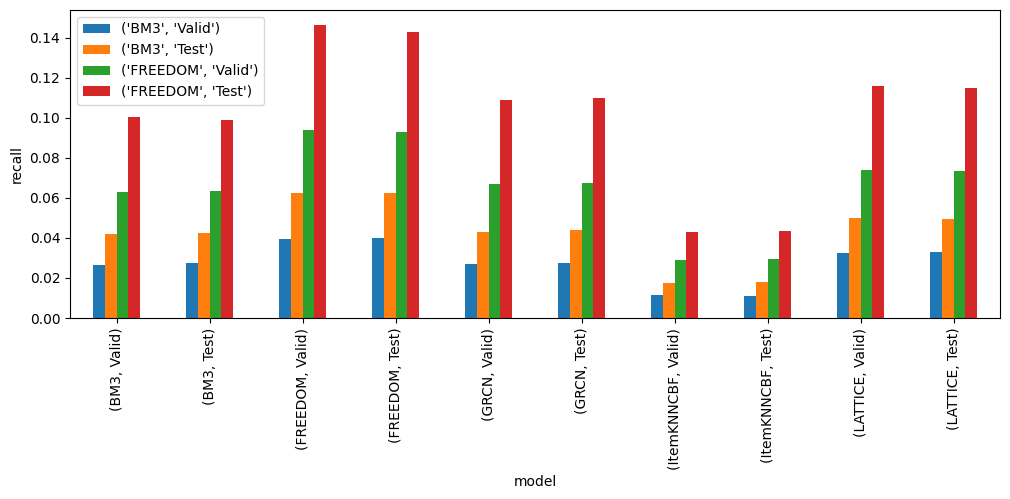

In [8]:
measure = 'recall'
ax= df.loc[:,f'{measure}@5':f'{measure}@50'].plot(kind = 'bar', figsize = (12,4), legend = True)
ax.set_xlabel('model')
ax.set_ylabel(measure)
ax.legend(df.loc[:,f'{measure}@5':f'{measure}@50'].index)